# Principal Component Analysis - PCA
Data-reduction technique that transforms a larger number of correlated variables into a much smaller set of uncorrelated variables called principal components.

PCA is a type of linear transformation on a given data set that has values for a certain number of variables (coordinates) for a certain amount of spaces. This linear transformation fits this dataset to a new coordinate system in such a way that the most significant variance is found on the first coordinate, and each subsequent coordinate is orthogonal to the last and has a lesser variance. 


# Exploratory Factor Analysis - EFA
Collection of methods designed to uncover the latent structure in a given set of variables. It looks for a smaller set of underlying or latent constructs that can explain the relationships among the observed or manifest variables

## Differences between the PCA and EFA 

<img src="fig1.png" alt="drawing" width="500"/>


* Principal components (PC1 and PC2) are linear combinations of the observed variables (X1 to X5). The weights used to form the linear composites are chosen to maximize the variance each principal component accounts for, while keeping the components uncorrelated.
* Factors (F1 and F2) are assumed to underlie or “cause” the observed variables, rather than being linear combinations of them. The errors (e1 to e5) represent the variance in the observed variables unexplained by the factors. The circles indicate that the factors and errors aren’t directly observable but are inferred from the correlations among the variables. In this example, the curved arrow between the factors indicates that they’re correlated.

The most common steps are as follows:



1. Prepare the data. Both PCA and EFA derive their solutions from the correlations among the observed variables. You can input either the raw data matrix or the correlation matrix to the ```principal()``` and ```fa()``` functions. If raw data is input, the correlation matrix is automatically calculated. Be sure to screen the data for missing values before proceeding.


2. Select a factor model. Decide whether PCA (data reduction) or EFA (uncovering latent structure) is a better fit for your research goals. If you select an EFA approach, you’ll also need to choose a specific factoring method (for example, maximum likelihood).


3. Decide how many components/factors to extract.


4. Extract the components/factors.


5. Rotate the components/factors.


6. Interpret the results.


7. Compute component or factor scores.

# Principal Components
The goal of PCA is to replace a large number of correlated variables with a smaller number of uncorrelated variables while capturing as much information in the original variables as possible.



These derived variables, called principal components, are linear combinations of the observed variables. Specifically, the first principal component:

#### $PC_{1} = a_{1}X_{1} + a_{2}X_{2} + ... + a_{k}X_{k}$

is the weighted combination of the k observed variables that accounts for the most
variance in the original set of variables


* The second principal component is the linear combination that accounts for the most variance in the original variables, under the constraint that it’s orthogonal (uncorrelated) to the first principal component.
* Each subsequent component maximizes the variance accounted for, while at the same time remaining uncorrelated with all previous components.



### You hope that you can approximate the full set of variables with a much smaller set of components.

# Example
The dataset USJudgeRatings contains lawyers’ ratings of state judges in the US Superior Court. The data frame contains 43 observations on 12 numeric variables. 11 evaluative ratings (INTG to RTEN)

![](fig2.png)


Several criteria are available for deciding how many components to retain in a PCA.
They include
* Basing the number of components on prior experience and theory
* Selecting the number of components needed to account for some threshold cumulative amount of variance in the variables (for example, 80%)
* Selecting the number of components to retain by examining the eigenvalues of the k × k correlation matrix among the variables
The first PC is associated with the largest eigenvalue, the second PC with the second-largest eigenvalue, and so on.

You can assess all three eigenvalue criteria at the same time via the ```fa.parallel()``` function.

The scree plot is used to determine the number of factors to retain in an exploratory factor analysis (FA) or principal components to keep in a principal component analysis (PCA). The plot displays the scree test based on the observed eigenvalues (as straightline segments and x’s), the mean eigenvalues derived from 100 random data matrices (as dashed lines), and the eigenvalues greater than 1 criteria (as a horizontal line at y=1).

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."

Parallel analysis suggests that the number of factors =  NA  and the number of components =  1 


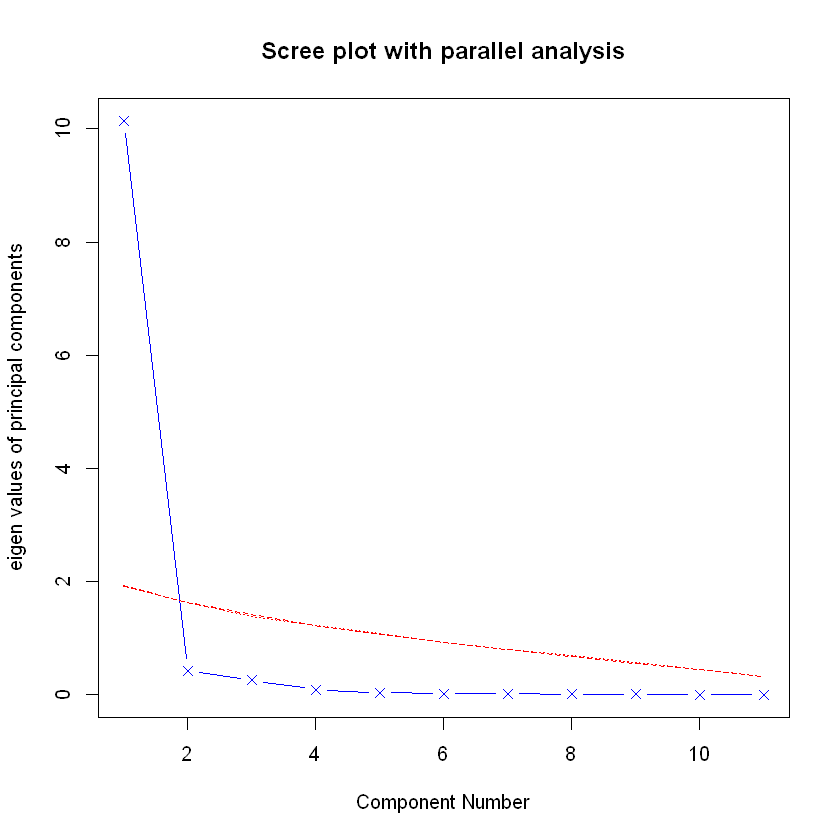

In [3]:
library(psych)
fa.parallel(USJudgeRatings[,-1], fa="pc", n.iter=100,
show.legend=FALSE, main="Scree plot with parallel analysis")

All criteria suggest that a single component is appropriate for summarizing this dataset. Extract the principal component using the ```principal()``` function

```principal(r, nfactors=, rotate=, scores=)```

* r is a correlation matrix or a raw data matrix.
* nfactors specifies the number of principal components to extract (1 by default).
* rotate indicates the rotation to be applied (Rotations are a set of mathematical techniques for transforming the component loading matrix into one that’s more interpretable).
* scores specifies whether to calculate principal-component scores (false by default).

In [4]:
library(psych)
pc <- principal(USJudgeRatings[,-1], nfactors=1)
pc

Principal Components Analysis
Call: principal(r = USJudgeRatings[, -1], nfactors = 1)
Standardized loadings (pattern matrix) based upon correlation matrix
      PC1   h2     u2 com
INTG 0.92 0.84 0.1565   1
DMNR 0.91 0.83 0.1663   1
DILG 0.97 0.94 0.0613   1
CFMG 0.96 0.93 0.0720   1
DECI 0.96 0.92 0.0763   1
PREP 0.98 0.97 0.0299   1
FAMI 0.98 0.95 0.0469   1
ORAL 1.00 0.99 0.0091   1
WRIT 0.99 0.98 0.0196   1
PHYS 0.89 0.80 0.2013   1
RTEN 0.99 0.97 0.0275   1

                 PC1
SS loadings    10.13
Proportion Var  0.92

Mean item complexity =  1
Test of the hypothesis that 1 component is sufficient.

The root mean square of the residuals (RMSR) is  0.04 
 with the empirical chi square  6.21  with prob <  1 

Fit based upon off diagonal values = 1

* The column labeled ```PC1``` contains the component loadings, which are the correlations of the observed variables with the principal component(s). If you extracted more than one principal component, there would be columns for PC2, PC3, and so on.

* Component loadings are used to interpret the meaning of components. You can see that each variable correlates highly with the first component (PC1). It therefore appears to be a general evaluative dimension.


* The column labeled h2 contains the component communalities—the amount of variance in each variable explained by the components.

* The u2 column contains the component uniquenesses—the amount of variance not accounted for by the components (or 1 – h2).
    * For example, 80% of the variance in physical ability (PHYS) ratings is accounted for by the first PC, and 20% isn’t. PHYS is the variable least well represented by a one-component solution.




* The row labeled SS Loadings contains the eigenvalues associated with the components.

* The eigenvalues are the standardized variance associated with a particular component (in this case, the value for the first component is 10). Finally, the row labeled Proportion Var represents the amount of variance accounted for by each component.

## Here you see that the first principal component accounts for 92% of the variance in the 11 variables.

# Example 2: More than 1 PC
The dataset Harman23.cor contains data on 8 body measurements for 305 girls. In this case, the dataset consists of the correlations among the variables
rather than the original data

![](fig3.png)

In this case, you need to identify the correlation matrix (the cov component of the Harman23.cor object) and specify the sample size (n.obs). You can see from the plot that a two-component solution is suggested. As in the first example, the Kaiser–Harris criteria, scree test, and parallel analysis agree. This
won’t always be the case, and you may need to extract different numbers of components and select the solution that appears most useful

In the Cattell Scree test, the eigenvalues are plotted against their component
numbers. Such plots typically demonstrate a bend or elbow, and the components
above this sharp break are retained.

Parallel analysis suggests that the number of factors =  NA  and the number of components =  2 


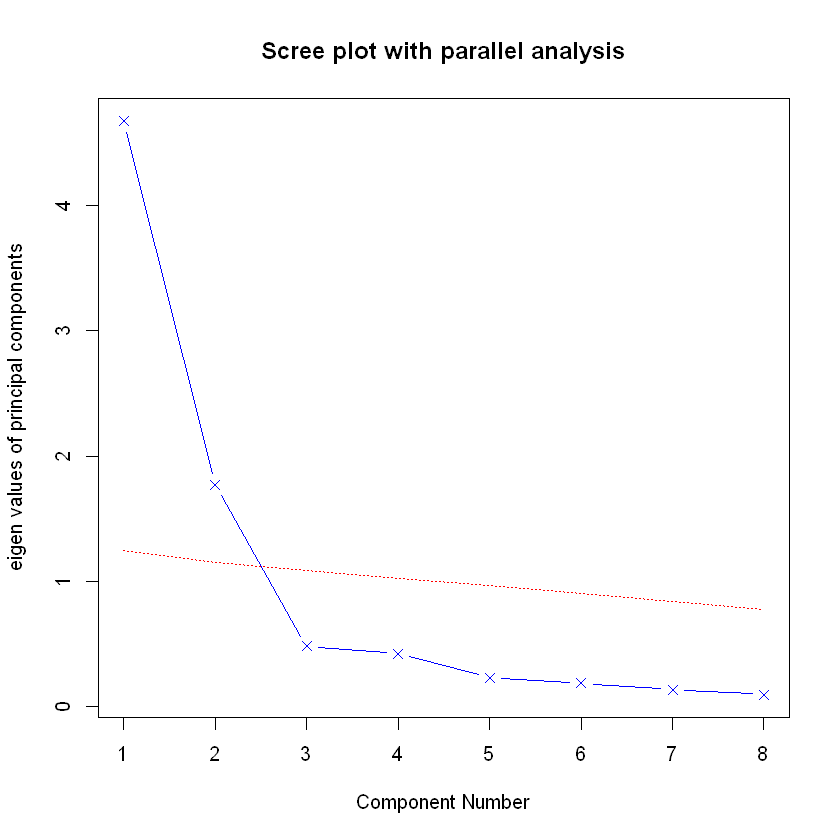

In [6]:
library(psych)
fa.parallel(Harman23.cor$cov, n.obs=302, fa="pc", n.iter=100,
show.legend=FALSE, main="Scree plot with parallel analysis")

In [8]:
library(psych)
pc <- principal(Harman23.cor$cov, nfactors=2, rotate="none")
pc

Principal Components Analysis
Call: principal(r = Harman23.cor$cov, nfactors = 2, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
                PC1   PC2   h2    u2 com
height         0.86 -0.37 0.88 0.123 1.4
arm.span       0.84 -0.44 0.90 0.097 1.5
forearm        0.81 -0.46 0.87 0.128 1.6
lower.leg      0.84 -0.40 0.86 0.139 1.4
weight         0.76  0.52 0.85 0.150 1.8
bitro.diameter 0.67  0.53 0.74 0.261 1.9
chest.girth    0.62  0.58 0.72 0.283 2.0
chest.width    0.67  0.42 0.62 0.375 1.7

                       PC1  PC2
SS loadings           4.67 1.77
Proportion Var        0.58 0.22
Cumulative Var        0.58 0.81
Proportion Explained  0.73 0.27
Cumulative Proportion 0.73 1.00

Mean item complexity =  1.7
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.05 

Fit based upon off diagonal values = 0.99

You see that the first component
accounts for 58% of the variance in the physical measurements, whereas the second
component accounts for 22%. Together, the two components account for 81% of
the variance.

# Rotations
* They “purifying” the components as much as possible. 
* Rotation methods differ with regard to whether the resulting components remain uncorrelated (orthogonal rotation) or are allowed to correlate (oblique rotation).
* They also differ in their definition of purifying. 
* The most popular orthogonal rotation is the varimax rotation, which attempts to purify the columns of the loading matrix, so that each component is defined by a limited set of variables (that is, each column has a few large loadings and many very small loadings).

In [10]:
rc <- principal(Harman23.cor$cov, nfactors=2, rotate="varimax")
rc

Principal Components Analysis
Call: principal(r = Harman23.cor$cov, nfactors = 2, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
                RC1  RC2   h2    u2 com
height         0.90 0.25 0.88 0.123 1.2
arm.span       0.93 0.19 0.90 0.097 1.1
forearm        0.92 0.16 0.87 0.128 1.1
lower.leg      0.90 0.22 0.86 0.139 1.1
weight         0.26 0.88 0.85 0.150 1.2
bitro.diameter 0.19 0.84 0.74 0.261 1.1
chest.girth    0.11 0.84 0.72 0.283 1.0
chest.width    0.26 0.75 0.62 0.375 1.2

                       RC1  RC2
SS loadings           3.52 2.92
Proportion Var        0.44 0.37
Cumulative Var        0.44 0.81
Proportion Explained  0.55 0.45
Cumulative Proportion 0.55 1.00

Mean item complexity =  1.1
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.05 

Fit based upon off diagonal values = 0.99

* Looking at the loadings in column RC1, you see that the first component is primarily defined by the first four variables (length variables).
* The loadings in the column RC2 indicate that the second component is primarily defined by variables 5 through 8 (volume variables) 
* Note that the two components are still uncorrelated and that together, they still explain the variables equally well

---

## The ultimate goal is to replace a larger set of correlated variables with a smaller set of derived variables.

---

USJudgeRatings example, you extracted a single principal component from
the raw data describing lawyers’ ratings on 11 variables. The ```principal()``` function
makes it easy to obtain scores for each participant on this derived variable

In [11]:
library(psych)
pc <- principal(USJudgeRatings[,-1], nfactors=1, score=TRUE)
head(pc$scores)

,PC1
"AARONSON,L.H.",-0.1857981
"ALEXANDER,J.M.",0.7469865
"ARMENTANO,A.J.",0.0704772
"BERDON,R.I.",1.1358765
"BRACKEN,J.J.",-2.1586211
"BURNS,E.B.",0.7669406


The principal component scores are saved in the scores element of the object returned by the ```principal()``` function when the option scores=TRUE.

If you wanted, you could now get the correlation between the number of contacts occurring between a lawyer and a judge and their evaluation of the judge using. 

In [13]:
cor(USJudgeRatings$CONT, pc$score)

PC1
-0.008815895


Apparently, there’s no relationship between the lawyer’s familiarity and their opinions!

When the principal components analysis is based on a correlation matrix and the
raw data aren’t available, getting principal component scores for each observation is
clearly not possible. But you can get the coefficients used to calculate the principal
components.

i.e: In the body measurement data, you have correlations among body measurements,
but you don’t have the individual measurements for these 305 girls.

In [14]:
library(psych)
rc <- principal(Harman23.cor$cov, nfactors=2, rotate="varimax")
round(unclass(rc$weights), 2)

,RC1,RC2
height,0.28,-0.05
arm.span,0.30,-0.08
forearm,0.30,-0.09
lower.leg,0.28,-0.06
weight,-0.06,0.33
bitro.diameter,-0.08,0.32
chest.girth,-0.10,0.34
chest.width,-0.04,0.27


The component scores are obtained using the formulas
$PC1 = 0.28*height + 0.30*arm.span + 0.30*forearm + 0.29*lower.leg -
0.06*weight - 0.08*bitro.diameter - 0.10*chest.girth -
0.04*chest.width$

and

$PC2 = -0.05*height - 0.08*arm.span - 0.09*forearm - 0.06*lower.leg +
0.33*weight + 0.32*bitro.diameter + 0.34*chest.girth +
0.27*chest.width$

These equations assume that the physical measurements have been standardized
(mean = 0, sd = 1).

# Exploratory factor analysis

The goal of EFA is to explain the correlations among a set of observed variables by uncovering a smaller set of more fundamental unobserved variables underlying the data. These hypothetical, unobserved variables are called factors. (Each factor is assumed to explain the variance shared among two or more observed variables, so technically, they’re called common factors.) 

The model can be represented as
#### $X_{i} = a_{1}F_{1} + a_{2}F_{2} + \cdot\cdot\cdot + a_{p}F_{p} + U_{i}$

where $X_{i}$ is the ith observed variable $(i = 1\cdot\cdot\cdot k)$, $F_{j}$ are the common factors $(j = 1\cdot\cdot\cdot p)$, and $p < k$. $U_{i}$ is the portion of variable $X_{i}$ unique to that variable (not explained by the common factors). The $a_{i}$ can be thought of as the degree to which each factor contributes to the composition of an observed variable.
> If we go back to the ```Harman74.cor``` example, we’d say that an individual’s scores on each of the 24 observed psychological tests is due to a weighted combination of their ability on 4 underlying psychological constructs.

# Example
You’ll apply EFA to the correlations among six psychological tests. One hundred twelve individuals were given six tests, including a nonverbal measure of
general intelligence (general), a picture-completion test (picture), a block design test (blocks), a maze test (maze), a reading comprehension test (reading), and a vocabulary test (vocab). Can you explain the participants’ scores on these tests with a smaller number of underlying or latent psychological constructs?

The covariance matrix among the variables is provided in the dataset ```ability.cov```. You can transform this into a correlation matrix using the cov2cor() function:

In [15]:
options(digits=2)
covariances <- ability.cov$cov
correlations <- cov2cor(covariances)
correlations

,general,picture,blocks,maze,reading,vocab
general,1.00,0.47,0.55,0.34,0.58,0.51
picture,0.47,1.00,0.57,0.19,0.26,0.24
blocks,0.55,0.57,1.00,0.45,0.35,0.36
maze,0.34,0.19,0.45,1.00,0.18,0.22
reading,0.58,0.26,0.35,0.18,1.00,0.79
vocab,0.51,0.24,0.36,0.22,0.79,1.00


## Deciding how many common factors to extract

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
"An ultra-Heywood case was detected.  Examine the results carefully"Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
"An ultra-Heywood case was detected.  Examine the results carefully"Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np

Parallel analysis suggests that the number of factors =  2  and the number of components =  1 


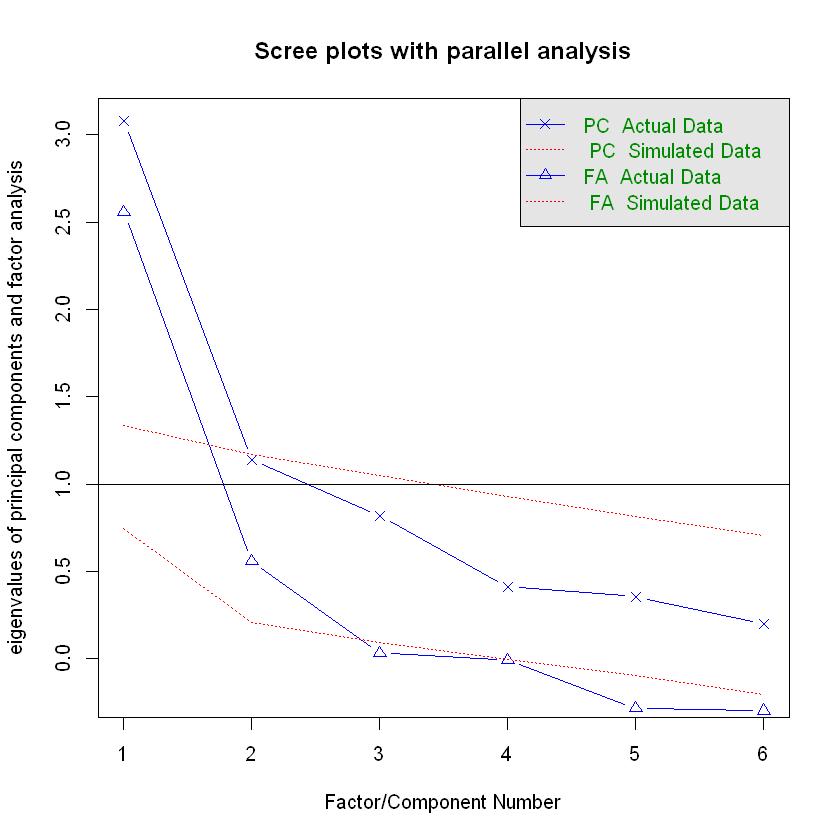

In [16]:
covariances <- ability.cov$cov
correlations <- cov2cor(covariances)
fa.parallel(correlations, n.obs=112, fa="both", n.iter=100, main="Scree plots with parallel analysis")

Looking at the EFA results, a two-factor solution is clearly indicated. The first two
eigenvalues (triangles) are above the bend in the scree test and also above the mean
eigenvalues based on 100 simulated data matrices. For EFA, the Kaiser–Harris criterion
is number of eigenvalues above 0, rather than 1.

# Extracting common factors



#### ```fa(r, nfactors=, n.obs=, rotate=, scores=, fm=)```
where
* r is a correlation matrix or a raw data matrix.
* nfactors specifies the number of factors to extract (1 by default).
* n.obs is the number of observations (if a correlation matrix is input).
* rotate indicates the rotation to be applied (oblimin by default).
* scores specifies whether or not to calculate factor scores (false by default).
* fm specifies the factoring method (minres by default).



Unlike PCA, there are many methods of extracting common factors including: 
* maximum likelihood (ml)
* iterated principal axis (pa)
* weighted least square (wls)
* generalized weighted least squares (gls)
* minimum residual (minres).

For this example, you’ll extract the unrotated factors using the iterated principal axis (fm = "pa") approach

In [17]:
fa <- fa(correlations, nfactors=2, rotate="none", fm="pa")
fa

Factor Analysis using method =  pa
Call: fa(r = correlations, nfactors = 2, rotate = "none", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
         PA1   PA2   h2    u2 com
general 0.75  0.07 0.57 0.432 1.0
picture 0.52  0.32 0.38 0.623 1.7
blocks  0.75  0.52 0.83 0.166 1.8
maze    0.39  0.22 0.20 0.798 1.6
reading 0.81 -0.51 0.91 0.089 1.7
vocab   0.73 -0.39 0.69 0.313 1.5

                       PA1  PA2
SS loadings           2.75 0.83
Proportion Var        0.46 0.14
Cumulative Var        0.46 0.60
Proportion Explained  0.77 0.23
Cumulative Proportion 0.77 1.00

Mean item complexity =  1.5
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  15  and the objective function was  2.5
The degrees of freedom for the model are 4  and the objective function was  0.07 

The root mean square of the residuals (RMSR) is  0.03 
The df corrected root mean square of the residuals is  0.06 

Fit based upon off diagon

# Factor extraction with orthogonal rotation

In [18]:
fa.varimax <- fa(correlations, nfactors=2, rotate="varimax", fm="pa")
fa.varimax

Factor Analysis using method =  pa
Call: fa(r = correlations, nfactors = 2, rotate = "varimax", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
         PA1  PA2   h2    u2 com
general 0.49 0.57 0.57 0.432 2.0
picture 0.16 0.59 0.38 0.623 1.1
blocks  0.18 0.89 0.83 0.166 1.1
maze    0.13 0.43 0.20 0.798 1.2
reading 0.93 0.20 0.91 0.089 1.1
vocab   0.80 0.23 0.69 0.313 1.2

                       PA1  PA2
SS loadings           1.83 1.75
Proportion Var        0.30 0.29
Cumulative Var        0.30 0.60
Proportion Explained  0.51 0.49
Cumulative Proportion 0.51 1.00

Mean item complexity =  1.3
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  15  and the objective function was  2.5
The degrees of freedom for the model are 4  and the objective function was  0.07 

The root mean square of the residuals (RMSR) is  0.03 
The df corrected root mean square of the residuals is  0.06 

Fit based upon off diagonal v

Reading and vocabulary load on the first factor; and picture completion, block design, and mazes load on the second factor. The general nonverbal intelligence measure loads on both factors. This may indicate a verbal intelligence factor and a nonverbal intelligence factor.



# Factor extraction with oblique rotation 

By using an orthogonal rotation, you artificially force the two factors to be uncorrelated.
What would you find if you allowed the two factors to correlate? You can try an oblique rotation such as promax

In [21]:
install.packages("GPArotation")

package 'GPArotation' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nemo\AppData\Local\Temp\Rtmp2h7nTl\downloaded_packages


In [22]:
library(GPArotation)
fa.promax<- fa(correlations, nfactors=2, rotate="promax", fm="pa")
fa.promax

Factor Analysis using method =  pa
Call: fa(r = correlations, nfactors = 2, rotate = "promax", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
          PA1   PA2   h2    u2 com
general  0.37  0.48 0.57 0.432 1.9
picture -0.03  0.63 0.38 0.623 1.0
blocks  -0.10  0.97 0.83 0.166 1.0
maze     0.00  0.45 0.20 0.798 1.0
reading  1.00 -0.09 0.91 0.089 1.0
vocab    0.84 -0.01 0.69 0.313 1.0

                       PA1  PA2
SS loadings           1.83 1.75
Proportion Var        0.30 0.29
Cumulative Var        0.30 0.60
Proportion Explained  0.51 0.49
Cumulative Proportion 0.51 1.00

 With factor correlations of 
     PA1  PA2
PA1 1.00 0.55
PA2 0.55 1.00

Mean item complexity =  1.2
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  15  and the objective function was  2.5
The degrees of freedom for the model are 4  and the objective function was  0.07 

The root mean square of the residuals (RMSR) is  0.03 
The d

Several differences exist between the orthogonal and oblique solutions:
* In an orthogonal solution, attention focuses on the factor structure matrix (the correlations of the variables with the factors). 
* In an oblique solution, there are three matrices to consider: the factor structure matrix, the factor pattern matrix, and the factor intercorrelation matrix.
    * The factor pattern matrix is a matrix of standardized regression coefficients. They give the weights for predicting the variables from the factors. 
    * The factor intercorrelation matrix gives the correlations among the factors.




> The values in the ```PA1``` and ```PA2``` columns constitute the factor pattern matrix. They’re standardized regression coefficients rather than correlations. Examination of the columns of this matrix is still used to name the factors.

> The factor intercorrelation matrix indicates that the correlation between the two factors is 0.57. This is a hefty correlation. If the factor intercorrelations had been low, you might have gone back to an orthogonal solution to keep things simple.

> The factor structure matrix (or factor loading matrix) isn’t provided. But you can easily calculate it using the formula $F = P*Phi$, where $F$ is the factor loading matrix, $P$ is the factor pattern matrix, and $Phi$ is the factor intercorrelation matrix.


In [23]:
fsm <- function(oblique) {
if (class(oblique)[2]=="fa" & is.null(oblique$Phi)) {
warning("Object doesn't look like oblique EFA")
} else {
P <- unclass(oblique$loading)
F <- P %*% oblique$Phi
colnames(F) <- c("PA1", "PA2")
return(F)
}
}

In [24]:
fsm(fa.promax)

,PA1,PA2
general,0.64,0.69
picture,0.32,0.61
blocks,0.43,0.91
maze,0.25,0.45
reading,0.95,0.46
vocab,0.83,0.45


Now you can review the correlations between the variables and the factors. Comparing them to the factor loading matrix in the orthogonal solution, you see that these columns aren’t as pure. This is because you’ve allowed the underlying factors to be correlated.

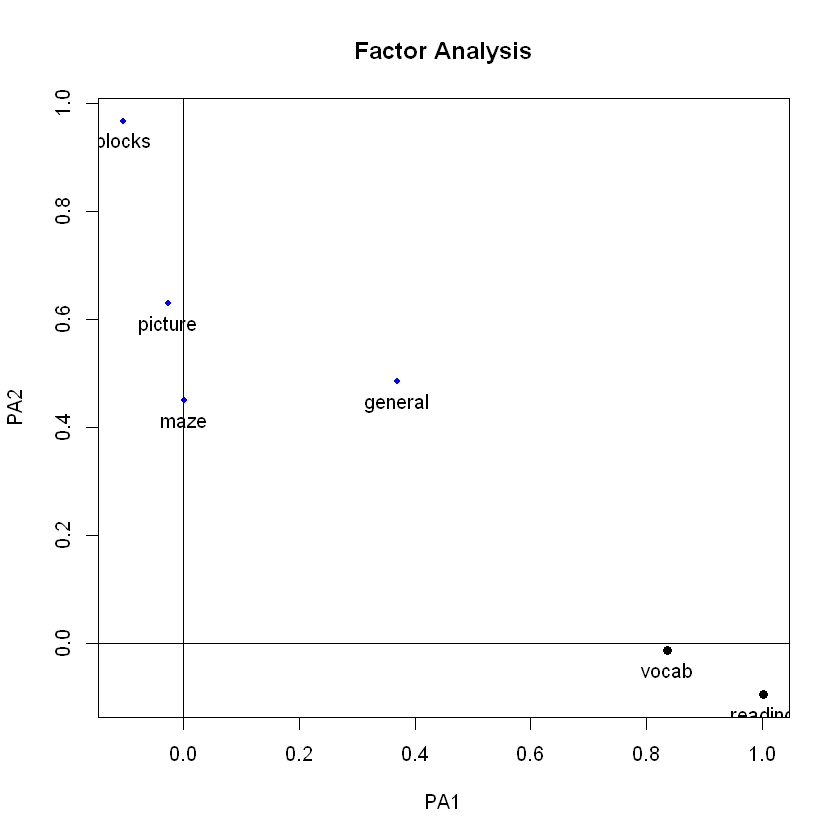

In [25]:
factor.plot(fa.promax, labels=rownames(fa.promax$loadings))

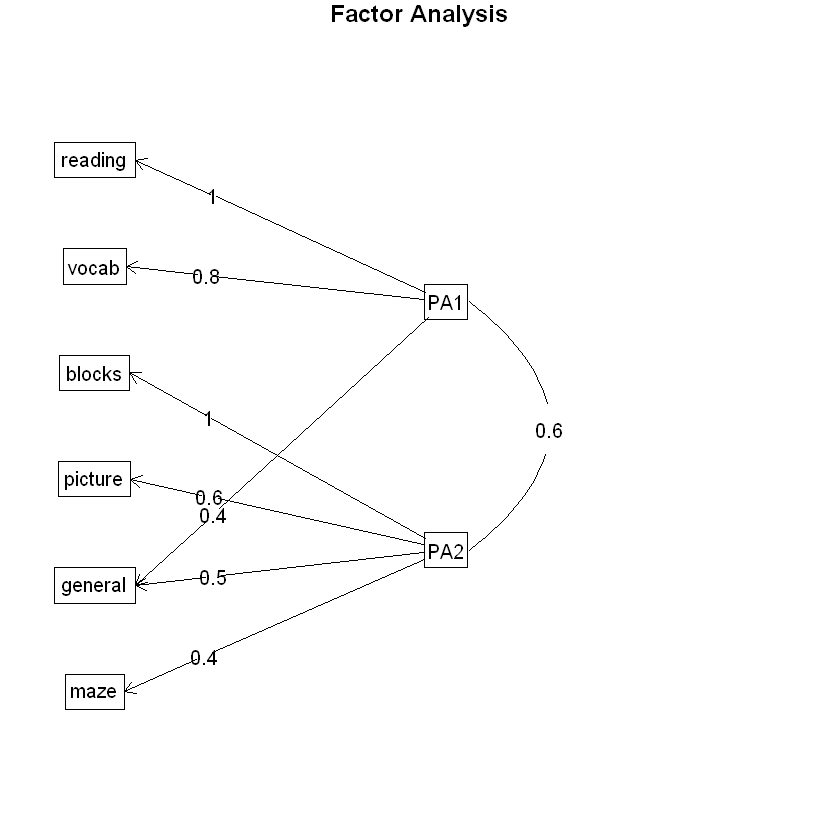

In [26]:
fa.diagram(fa.promax, simple=FALSE)

# Factor scores
Compared with PCA, the goal of EFA is much less likely to be the calculation of factor scores. But these scores are easily obtained from the fa() function by including the ```score = TRUE``` option (when raw data are available). Additionally, the scoring coefficients (standardized regression weights) are available in the weights element of the object returned.

In [27]:
fa.promax$weights

,PA1,PA2
general,0.078,0.211
picture,0.020,0.090
blocks,0.037,0.702
maze,0.027,0.035
reading,0.743,0.030
vocab,0.177,0.036


Unlike component scores, which are calculated exactly, factor scores can only be estimated.

![](fig4.png)

# One Example of PCA from Datacamp
https://www.datacamp.com/community/tutorials/pca-analysis-r

In this section, you will try a PCA using a simple and easy to understand dataset. You will use the mtcars dataset, which is built into R. This dataset consists of data on 32 models of car, taken from an American motoring magazine (1974 Motor Trend magazine). For each car, you have 11 features, expressed in varying units (US units), They are as follows:

* mpg: Fuel consumption (Miles per (US) gallon): more powerful and heavier cars tend to consume more fuel.
* cyl: Number of cylinders: more powerful cars often have more cylinders
* disp: Displacement (cu.in.): the combined volume of the engine's cylinders
* hp: Gross horsepower: this is a measure of the power generated by the car
* drat: Rear axle ratio: this describes how a turn of the drive shaft corresponds to a turn of the wheels. Higher values will decrease fuel efficiency.
* wt: Weight (1000 lbs): pretty self-explanatory!
* qsec: 1/4 mile time: the cars speed and acceleration
* vs: Engine block: this denotes whether the vehicle's engine is shaped like a "V", or is a more common straight shape.
* am: Transmission: this denotes whether the car's transmission is automatic (0) or manual (1).
* gear: Number of forward gears: sports cars tend to have more gears.
* carb: Number of carburetors: associated with more powerful engines

## Compute the Principal Components
Because PCA works best with numerical data, you'll exclude the two categorical variables (```vs``` and ```am```). You are left with a matrix of 9 columns and 32 rows, which you pass to the ```prcomp()``` function, assigning your output to ```mtcars.pca```

In [2]:
mtcars.pca <- prcomp(mtcars[,c(1:7,10,11)], center = TRUE,scale. = TRUE)
summary(mtcars.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3782 1.4429 0.71008 0.51481 0.42797 0.35184 0.32413
Proportion of Variance 0.6284 0.2313 0.05602 0.02945 0.02035 0.01375 0.01167
Cumulative Proportion  0.6284 0.8598 0.91581 0.94525 0.96560 0.97936 0.99103
                          PC8     PC9
Standard deviation     0.2419 0.14896
Proportion of Variance 0.0065 0.00247
Cumulative Proportion  0.9975 1.00000

You obtain 9 principal components, which you call PC1-9. Each of these explains a percentage of the total variation in the dataset. That is to say: PC1 explains 63% of the total variance, which means that nearly two-thirds of the information in the dataset (9 variables) can be encapsulated by just that one Principal Component. PC2 explains 23% of the variance. So, by knowing the position of a sample in relation to just PC1 and PC2, you can get a very accurate view on where it stands in relation to other samples, as just PC1 and PC2 can explain 86% of the variance.

In [3]:
str(mtcars.pca)

List of 5
 $ sdev    : num [1:9] 2.378 1.443 0.71 0.515 0.428 ...
 $ rotation: num [1:9, 1:9] -0.393 0.403 0.397 0.367 -0.312 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:9] "mpg" "cyl" "disp" "hp" ...
  .. ..$ : chr [1:9] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:9] 20.09 6.19 230.72 146.69 3.6 ...
  ..- attr(*, "names")= chr [1:9] "mpg" "cyl" "disp" "hp" ...
 $ scale   : Named num [1:9] 6.027 1.786 123.939 68.563 0.535 ...
  ..- attr(*, "names")= chr [1:9] "mpg" "cyl" "disp" "hp" ...
 $ x       : num [1:32, 1:9] -0.664 -0.637 -2.3 -0.215 1.587 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:32] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
  .. ..$ : chr [1:9] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


* The center point ($\$center$), scaling ($\$scale$), standard deviation(sdev) of each principal component
* The relationship (correlation or anticorrelation, etc) between the initial variables and the principal components ($\$rotation$)
* The values of each sample in terms of the principal components ($\$x$)

# Plotting PCA
Now it's time to plot your PCA. You will make a biplot, which includes both the position of each sample in terms of PC1 and PC2 and also will show you how the initial variables map onto this. You will use the ggbiplot package, which offers a user-friendly and pretty function to plot biplots. A biplot is a type of plot that will allow you to visualize how the samples relate to one another in our PCA (which samples are similar and which are different) and will simultaneously reveal how each variable contributes to each principal component.

In [1]:
library(devtools)
install_github("vqv/ggbiplot")

Loading required package: usethis


colorspace (1.4-1 -> 2.0-0) [CRAN]
utf8       (1.1.4 -> 1.2.1) [CRAN]
vctrs      (0.3.6 -> 0.3.7) [CRAN]
fansi      (0.4.0 -> 0.4.2) [CRAN]
tibble     (3.0.6 -> 3.1.0) [CRAN]
scales     (1.0.0 -> 1.1.1) [CRAN]


Installing 6 packages: colorspace, utf8, vctrs, fansi, tibble, scales


package 'colorspace' successfully unpacked and MD5 sums checked
package 'utf8' successfully unpacked and MD5 sums checked
package 'vctrs' successfully unpacked and MD5 sums checked
package 'fansi' successfully unpacked and MD5 sums checked
package 'tibble' successfully unpacked and MD5 sums checked
package 'scales' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nemo\AppData\Local\Temp\Rtmpo9dpqT\downloaded_packages
v  checking for file 'C:\Users\Nemo\AppData\Local\Temp\Rtmpo9dpqT\remotes24879175dd2\vqv-ggbiplot-7325e88/DESCRIPTION' (401ms)
-  preparing 'ggbiplot':
v  checking DESCRIPTION meta-information
-  checking for LF line-endings in source and make files and shell scripts
-  checking for empty or unneeded directories
-  looking to see if a 'data/datalist' file should be added
-  building 'ggbiplot_0.55.tar.gz'
   


Loading required package: ggplot2
Loading required package: plyr
Loading required package: scales
Loading required package: grid


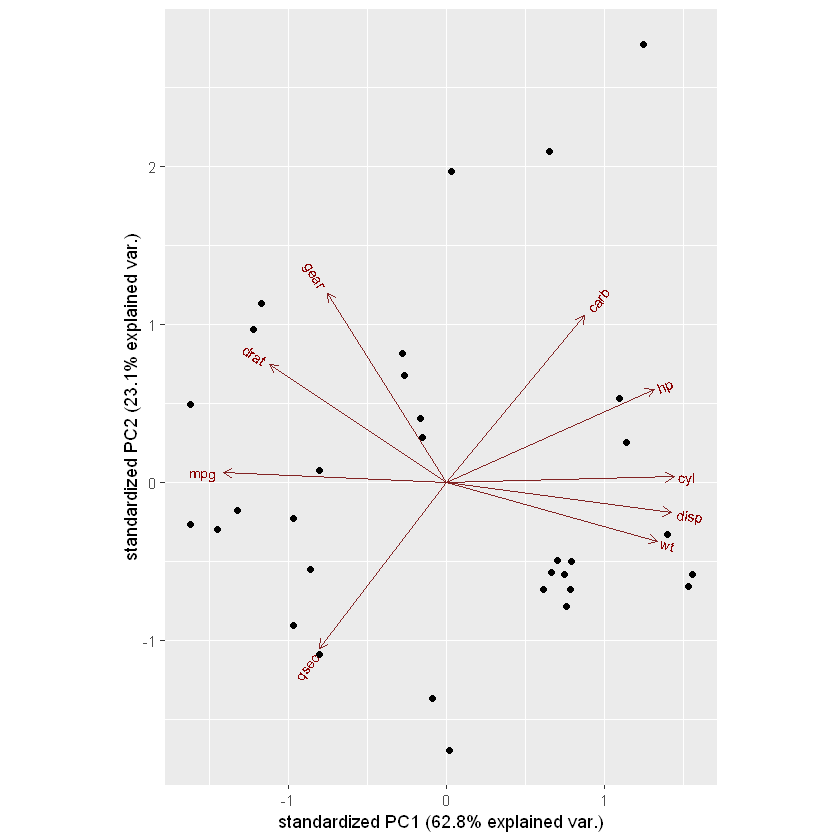

In [4]:
library(ggbiplot)
ggbiplot(mtcars.pca)

The axes are seen as arrows originating from the center point. Here, you see that the variables hp, cyl, and disp all contribute to PC1, with higher values in those variables moving the samples to the right on this plot. This lets you see how the data points relate to the axes, but it's not very informative without knowing which point corresponds to which sample (car).

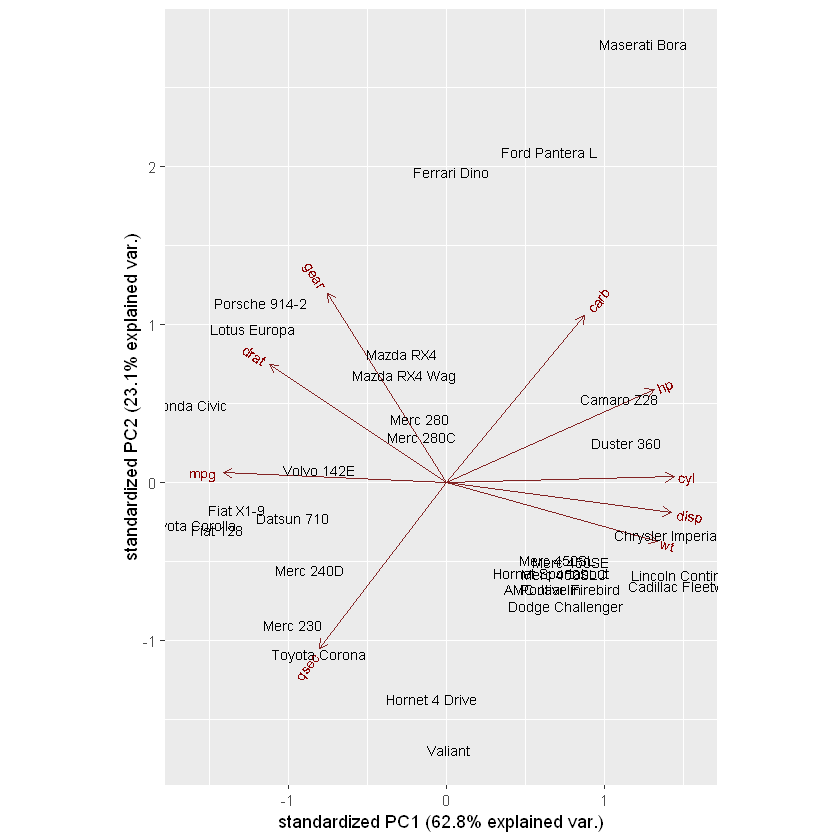

In [5]:
ggbiplot(mtcars.pca, labels=rownames(mtcars))

# Interpreting the results
Maybe if you look at the origin of each of the cars. You'll put them into one of three categories (cartegories?), one each for the US, Japanese and European cars. You make a list for this info, then pass it to the groups argument of ggbiplot. You'll also set the ellipse argument to be TRUE, which will draw an ellipse around each group.

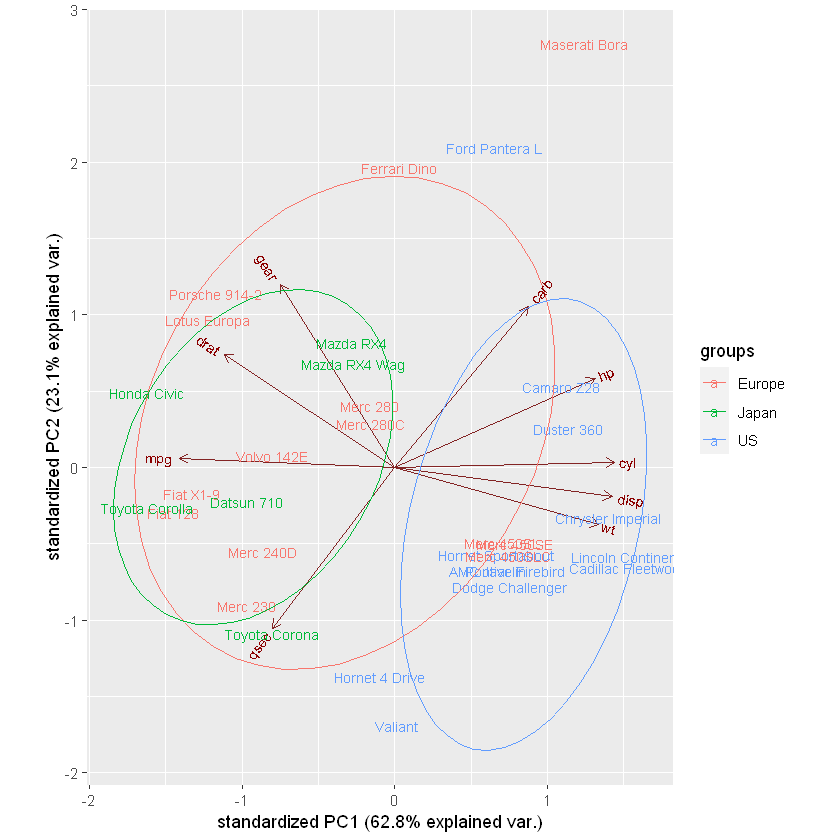

In [6]:
mtcars.country <- c(rep("Japan", 3), rep("US",4), rep("Europe", 7),rep("US",3), "Europe", rep("Japan", 3), rep("US",4), rep("Europe", 3), "US", rep("Europe", 3))
ggbiplot(mtcars.pca,ellipse=TRUE,  labels=rownames(mtcars), groups=mtcars.country)

Now you see something interesting: the American cars form a distinct cluster to the right. Looking at the axes, you see that the American cars are characterized by high values for cyl, disp, and wt. Japanese cars, on the other hand, are characterized by high mpg. European cars are somewhat in the middle and less tightly clustered than either group.

Of course, you have many principal components available, each of which map differently to the original variables. You can also ask ggbiplot to plot these other components, by using the choices argument.

Let's have a look at PC3 and PC4:

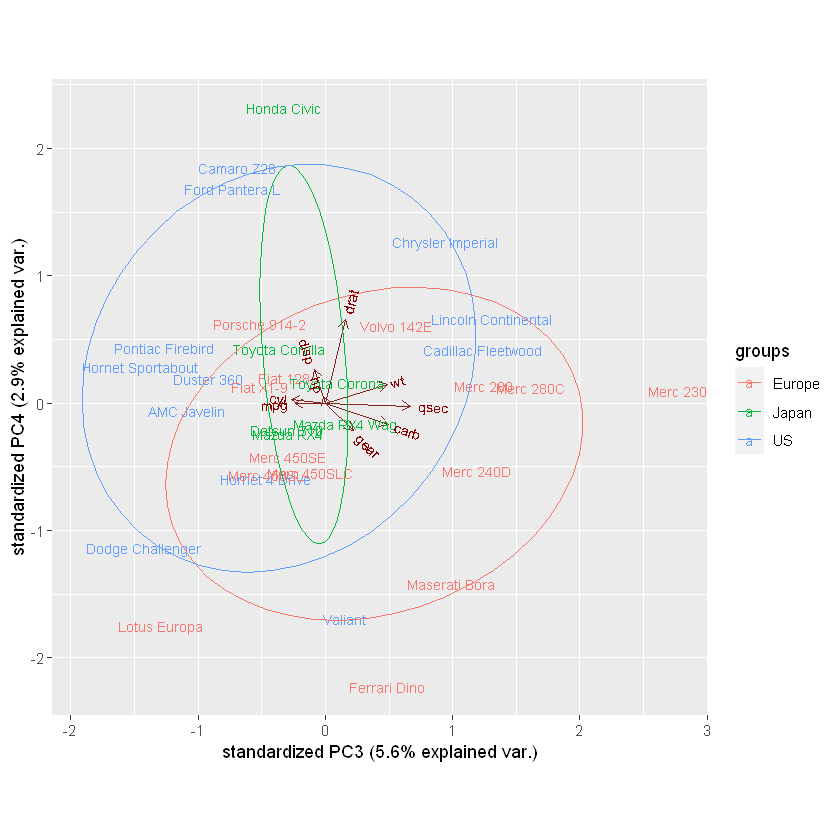

In [7]:
ggbiplot(mtcars.pca,ellipse=TRUE,choices=c(3,4),   labels=rownames(mtcars), groups=mtcars.country)


You don't see much here, but this isn't too surprising. PC3 and PC4 explain very small percentages of the total variation, so it would be surprising if you found that they were very informative and separated the groups or revealed apparent patterns.

Let's take a moment to recap: having performed a PCA using the mtcars dataset, we can see a clear separation between American and Japanese cars along a principal component that is closely correlated to cyl, disp, wt, and mpg. This provides us with some clues for future analyses; if we were to try to build a classification model to identify the origin of a car, these variables might be useful.

You can also remove the arrows altogether, using var.axes.

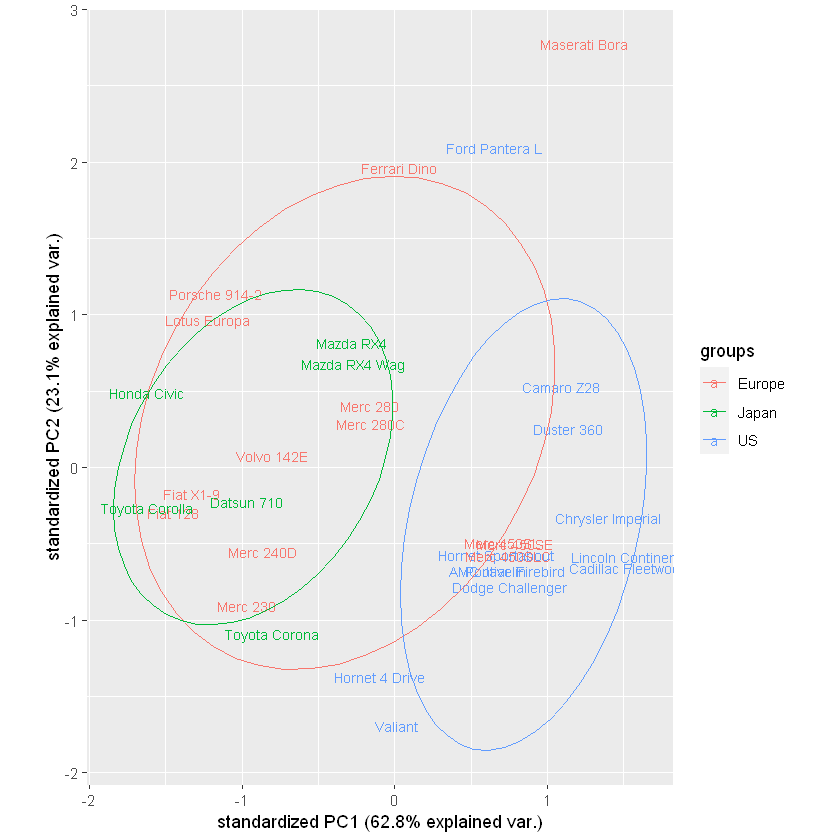

In [8]:
ggbiplot(mtcars.pca,ellipse=TRUE,var.axes=FALSE,   labels=rownames(mtcars), groups=mtcars.country)